In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# iris data를 불러온다.
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model=KNeighborsClassifier(n_neighbors=5)
# n_neighbors=5 : 인접한 5개 중 비교(default = 5)

In [10]:
# model 훈련(데이터 주입)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
# test data 에 대해 맞춘 확률
model.score(X_test,y_test)

0.9736842105263158

In [12]:
# X_test에 대한 Y값을 추측
pred_y=model.predict(X_test)

(4.444999999999999, 7.855, 2.4299999999999997, 3.9699999999999993)

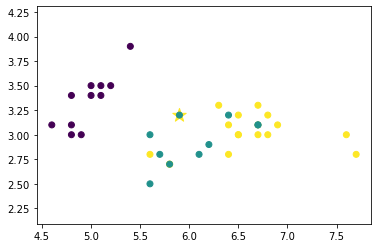

In [13]:
# 일치 하지 않는 data를 추려냄
bad=X_test[pred_y!=y_test]

plt.scatter(bad[:,0],bad[:,1],marker='*',c=pred_y[y_test!=pred_y],s=200,vmin=0,vmax=2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.axis('equal')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212B9A5E208>,
      dtype=object)

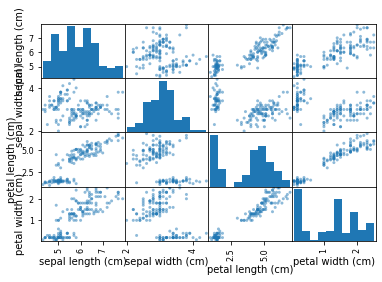

In [14]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df)

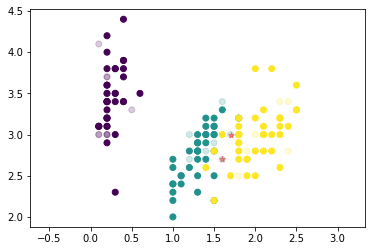

In [15]:
#속성을 정해두고 진행한다.
col1=3
col2=1
X=iris.data[:,[col1,col2]]
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y)

model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
pred_y=model.predict(X_test)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.axis('equal')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,alpha=0.2)
plt.scatter(X_test[pred_y!=y_test][:,0],X_test[pred_y!=y_test][:,1],marker='*',c='r',alpha=0.4)

In [16]:
# 속성 2개, k=1
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

score=model.score(X_test,y_test)
score

0.9210526315789473

In [17]:
import mglearn

In [46]:
# 속성 컨트롤
col1=0
col2=1

X=iris.data[:,[col1,col2]]
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y)

model=KNeighborsClassifier(n_neighbors=3)
# n_neighbors=3

model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

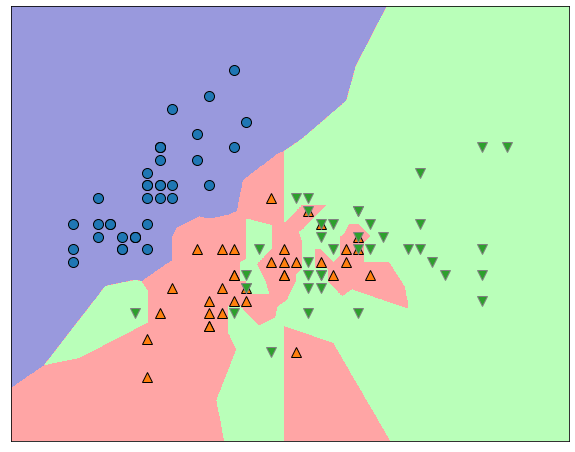

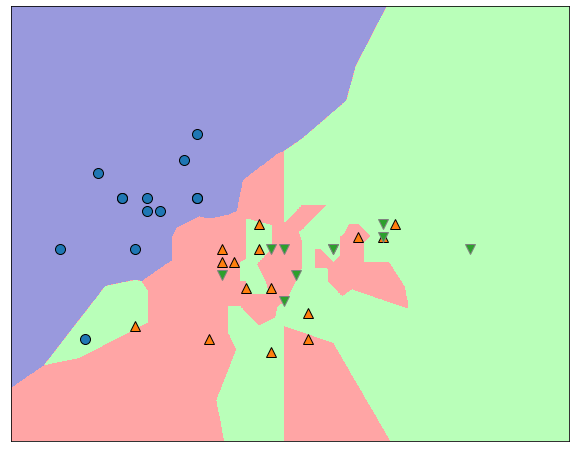

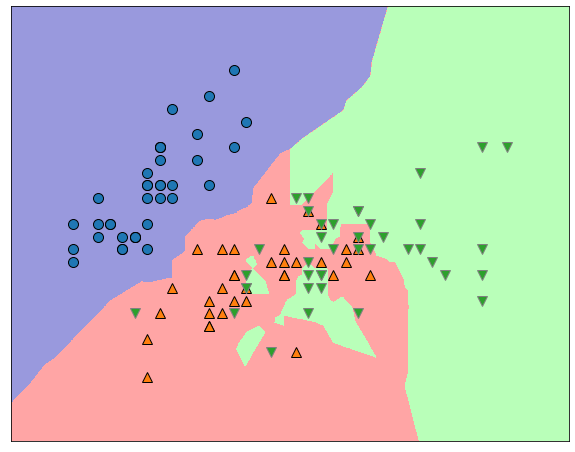

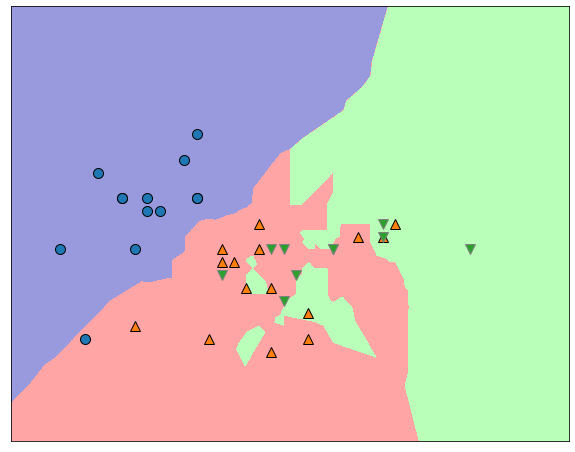

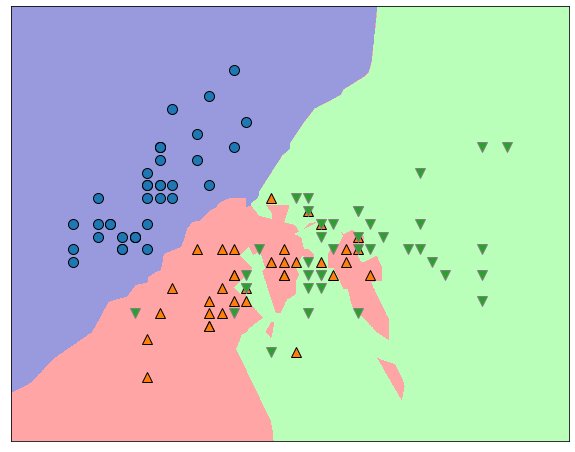

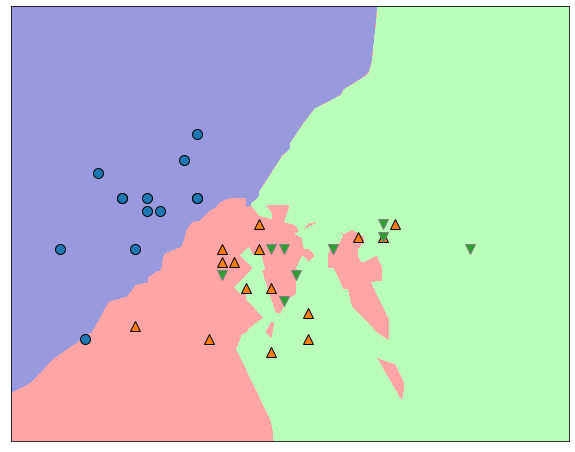

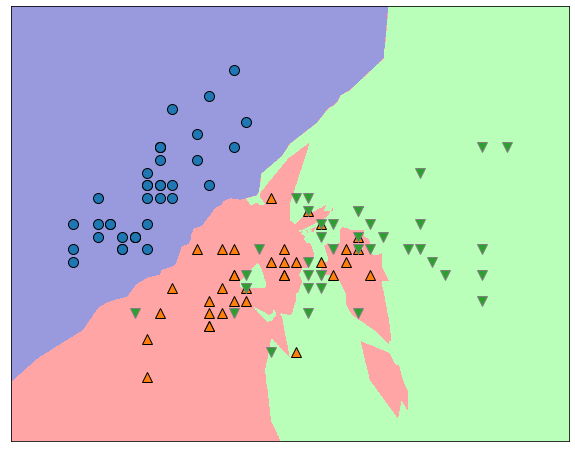

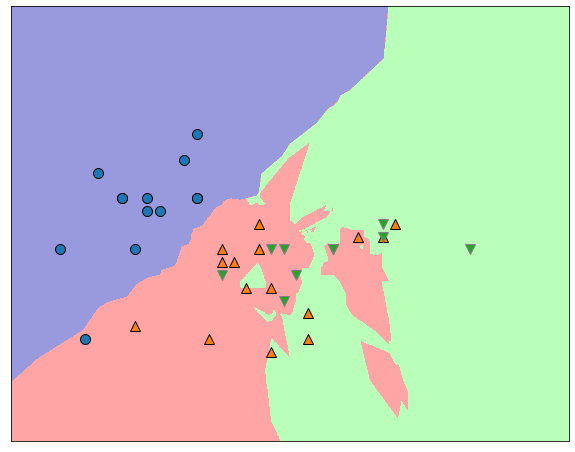

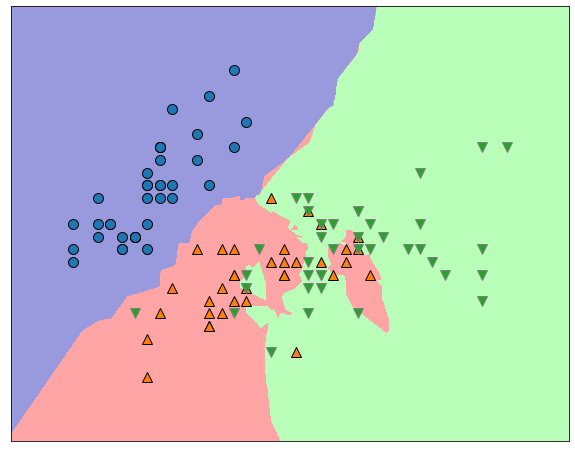

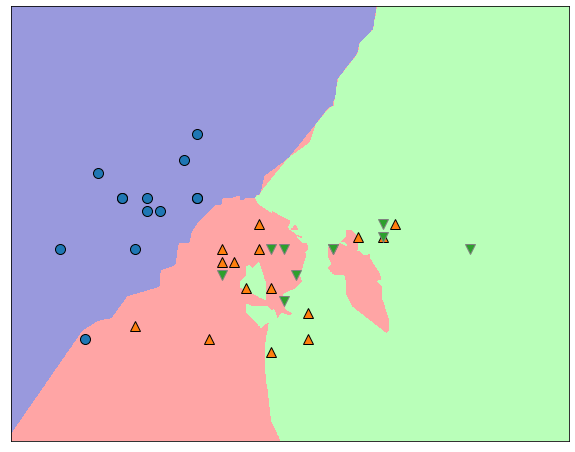

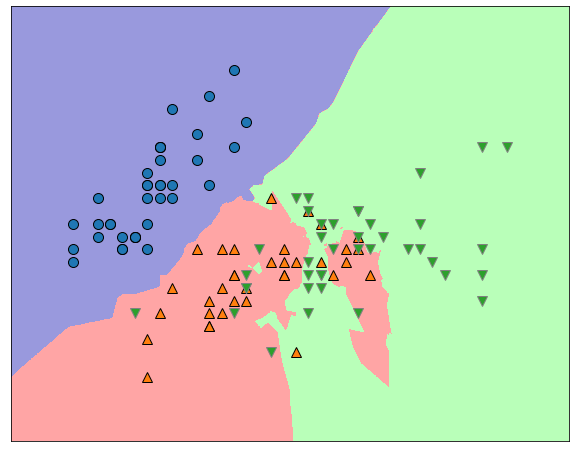

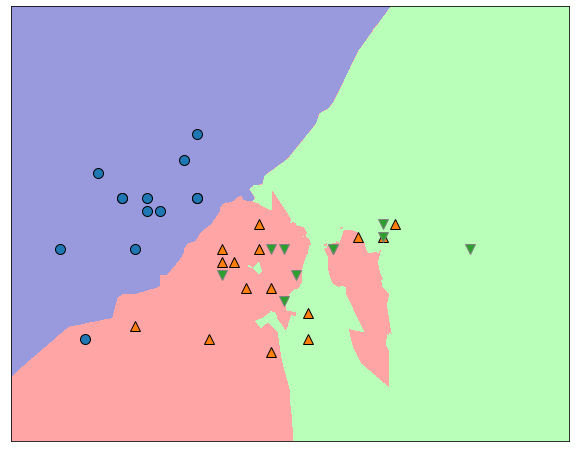

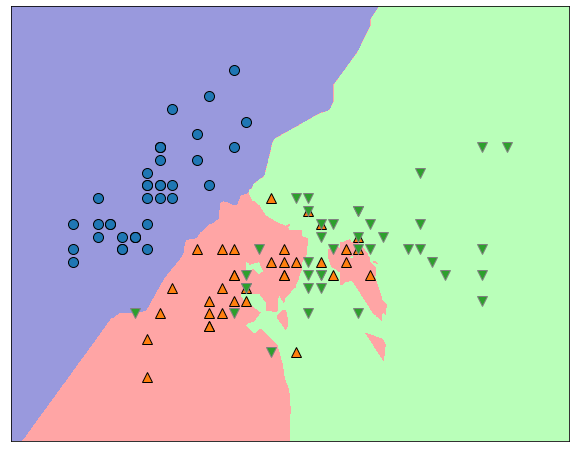

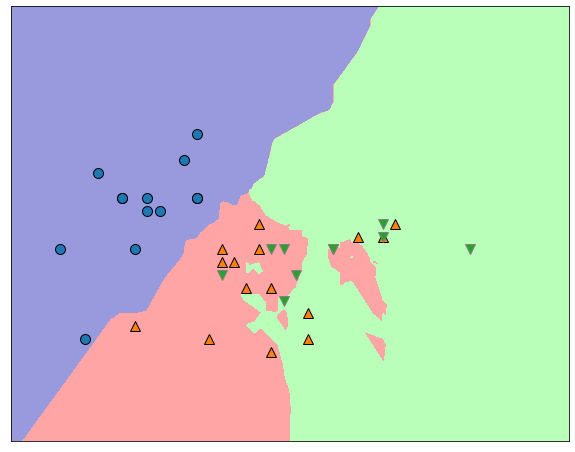

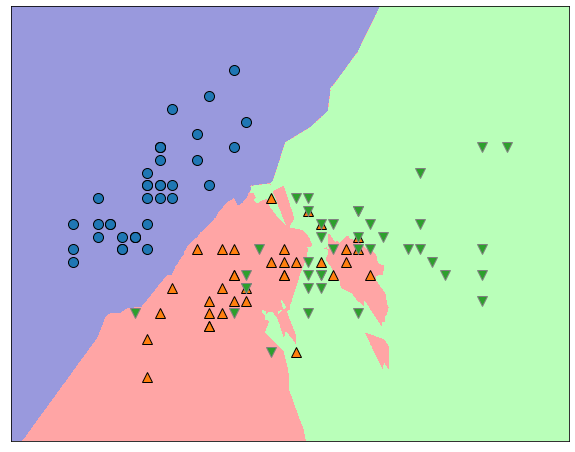

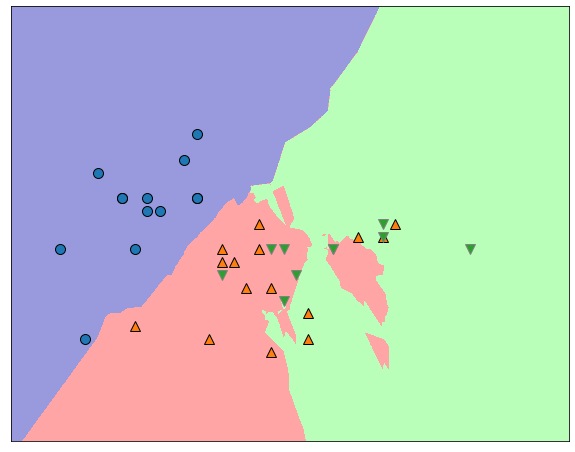

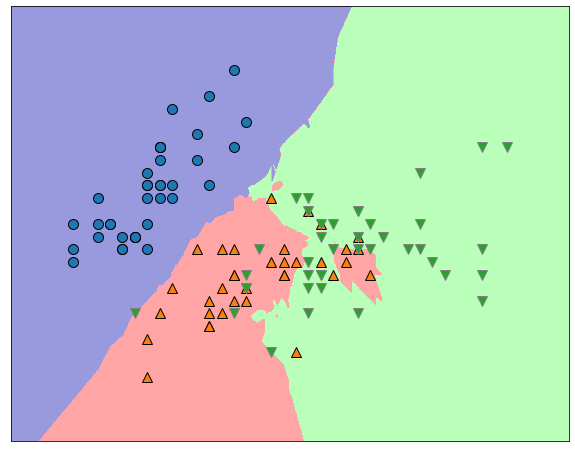

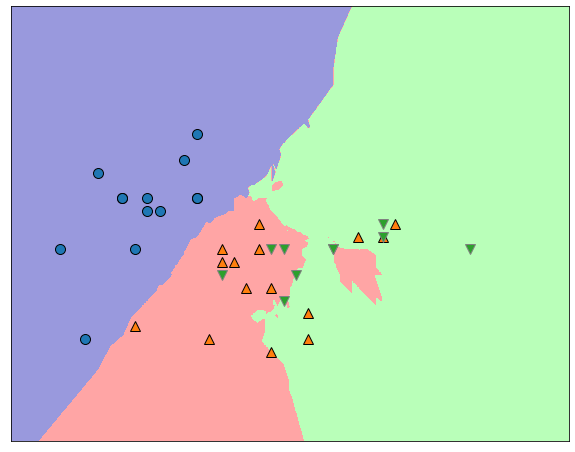

In [47]:
for i in range(1,10):
    model=KNeighborsClassifier(n_neighbors=i)
    # n_neighbors=i
    model.fit(X_train,y_train)
    plt.figure(figsize=[10,8]) # 그래프 사이즈
    mglearn.plots.plot_2d_classification(model,X_train,fill=True,eps=0.5,alpha=0.4) # 바탕색과 관련
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train) # train data에 대한 산점도
    #mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test) # test data에 대한 산점도
    
    plt.figure(figsize=[10,8]) # 그래프 사이즈
    mglearn.plots.plot_2d_classification(model,X_train,fill=True,eps=0.5,alpha=0.4) # 바탕색과 관련
    #mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train) # train data에 대한 산점도
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test) # test data에 대한 산점도

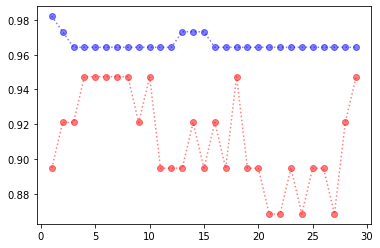

In [57]:
# 속성 컨트롤
col1=3
col2=1

X=iris.data[:,[col1,col2]]
y=iris.target

test_scores=[]
train_scores=[]
index=range(1,30)
X_train,X_test,y_train,y_test=train_test_split(X,y)

for k in index:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    test_scores.append(model.score(X_test,y_test))
    train_scores.append(model.score(X_train,y_train))
    
plt.plot(index,test_scores,'ro:',alpha=0.5)
plt.plot(index,train_scores,'bo:',alpha=0.5)